In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp, odeint
import scipy.integrate as scint
import scipy
import pylab 

In [6]:
def dynamical_model1(x, alpha = 0):
    return alpha - (x **2)

In [7]:
def dynamical_model2(x, alpha):
    return alpha - 2 * (x **2) - 3

In [50]:
# Create the bifurcation diagram
def bifurcation_diagram(seed, n_skip, n_iter, step=0.0001, r_min=-1):
    R = []
    X = []
    
    r_range = np.linspace(r_min, 4, int(1/step))
    print(r_range)
    for r in r_range:
        x = seed;
        
        for i in range(n_iter+n_skip+1):
            #if i >= n_skip:
                R.append(r)
                X.append(x)
                
                x += dynamical_model2(x, r);
    # Plot the data    
    plt.figure(figsize=(15,15))
    plt.plot(R, X, ls='', marker=',')
    plt.ylim(-10, 10)
    plt.xlim(r_min, 4)
    plt.xlabel('r')
    plt.ylabel('X')
    plt.show()



[-1.         -0.99949995 -0.9989999  ...  3.9989999   3.99949995
  4.        ]


/home/cyrine/Ex3Env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


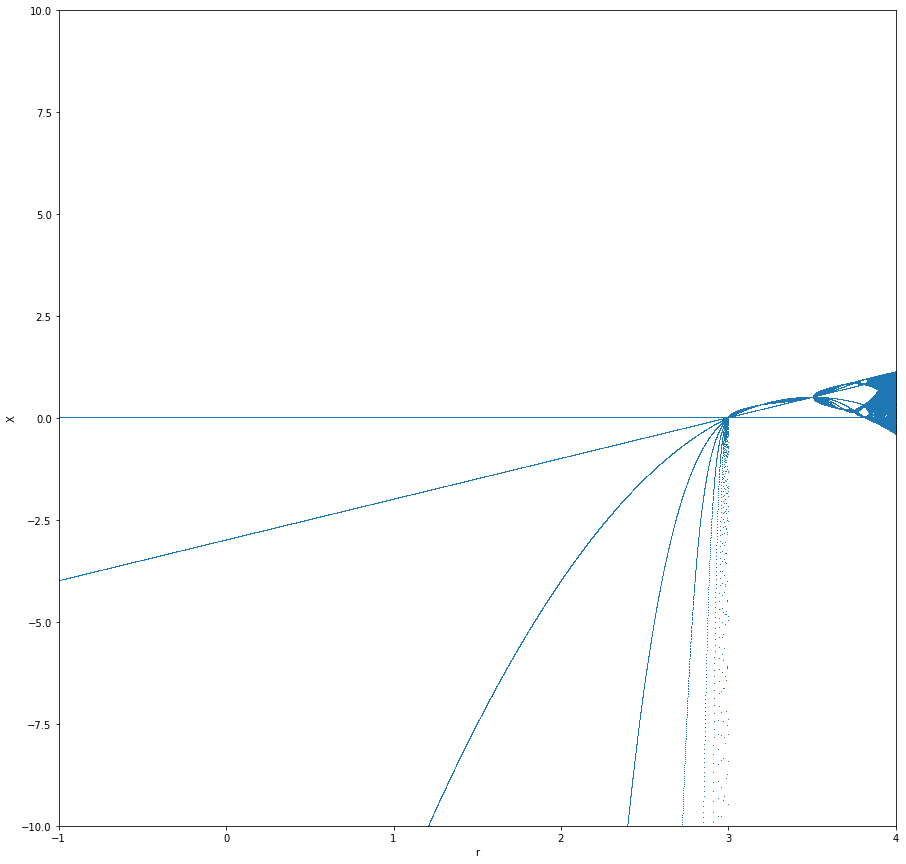

In [51]:
bifurcation_diagram(0, 100, 10)